In [11]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [30]:
#load data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

xtrain=xtrain[:6000,:,:]
xtest=xtest[:2000,:,:]
xtrain.shape, xtest.shape

((6000, 28, 28), (2000, 28, 28))

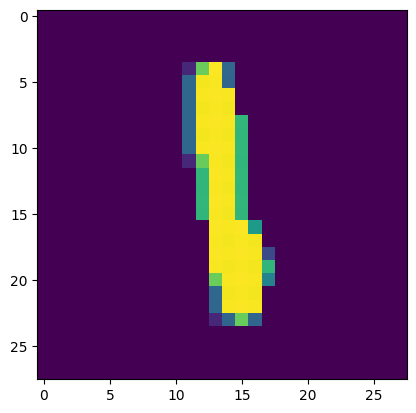

1


In [31]:
plt.imshow(xtrain[200])
plt.show()
print(ytrain[200])


In [32]:
xtrain=xtrain.reshape((-1,28*28))
xtest=xtest.reshape((-1,28*28))
xtrain.shape, xtest.shape

((6000, 784), (2000, 784))

In [33]:
#normalize the data
xtrain=xtrain/255
xtest=xtest/255

In [36]:
model = Sequential([
    # 1st convolutional layer 
    Conv2D(filters=96, input_shape=(6000,784,3),kernel_size=(11,11),strides=(4,4),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    BatchNormalization(),

    #2nd Convolutional layer
    Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    BatchNormalization(),

    #3d Convolutional layer
    Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    # MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    BatchNormalization(),

    #4th convolutional layer
    Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    # MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    BatchNormalization(),

    #5th convolutional layer
    Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    BatchNormalization(),

    Flatten(),

    #1st Dense layer
    Dense(4096, input_shape=(224*224*3,), activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    #2nd Dense layer
    Dense(4096, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    #output layer
    Dense(10, activation='softmax')
    
])

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[936960,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [21]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
y=to_categorical(ytrain)

In [22]:
model.fit(x=xtrain,y=to_categorical(ytrain),epochs=10,batch_size=64,shuffle=True)

Epoch 1/10


ValueError: in user code:

    File "E:\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\anaconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 60000, 784, 3), found shape=(None, 784)


In [ ]:
eval = model.evaluate(x_test, to_categorical(y_test))
print('eval')

In [ ]:
# Predictions
predictions = model.predict(x_test[0:100])
predictions[0]
np.argmax(predictions[0])
plt.imshow(x_test[0].reshape(28,28))